
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E02_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

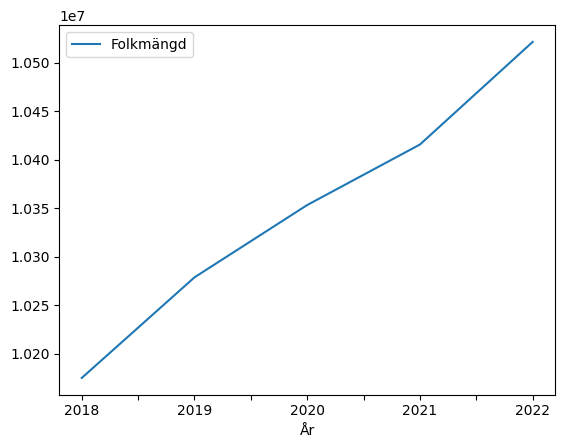

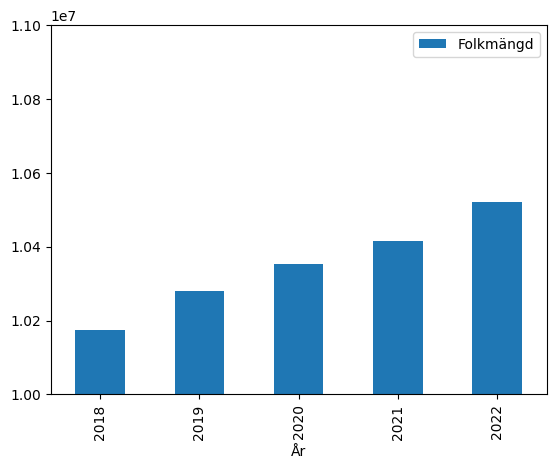

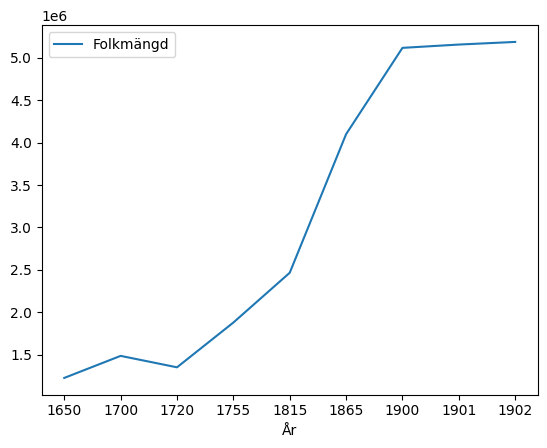

In [1]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt
import re
# a) Read in the data from:
# https://sv.wikipedia.org/wiki/Sveriges_demografi#Befolkningsstatistik_sedan_1900
tables=pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi#Befolkningsstatistik_sedan_1900")
tables[6]


df = pd.DataFrame(tables[6])
#df.index = df["Unnamed: 0"]
df.rename( columns={
    "Unnamed: 0":"Årtal", 
    "Medel- folkmängd":"MFM",
    "Nativitet (per 1000)":"Nativitet/1k",
    "Dödstal (per 1000)":"Dödstal/1k",
    },  inplace=True)

# b) 
#df.columns
#df["Årtal"] = df["Årtal"].astype(int)
#df["MFM"].astype(str)
#df["MFM"] = pd.to_numeric(df["MFM"])
#df["MFM"] = df["MFM"].convert_objects(convert_numeric=True)
# Converts target column in a dataframe to float
# making sure tog get rid of gap numbers like (12 453) and 
# numbers with the wrong decimal indicator aka (,)
def to_float(df, col):
    li = list(df[col])
    li = [ float( re.sub(r"[\s]",r"",re.sub(r"[,]",r".",st)) ) for st in li ]
    df[col]=li
to_float(df, "MFM")  

#df[::10].plot(kind="bar", x="Årtal", y="MFM")
plt.show()
#df["MFM"].dtype
df["MFM"]
df

to_float(df,"Födda")
to_float(df,"Döda")
#df[::10].plot(kind="line", x="Årtal", y=["Födda","Döda"])
plt.show()
df.columns

#to_float(df,"Nativitet/1k")
#to_float(df,"Dödstal/1k")
#df[["Nativitet/1k","Dödstal/1k"]].sum().plot(  kind="pie",)

"""
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))
"""

# c)
# Uses dfc as a por mans reset to get rid of the multi idexing
dfc = pd.DataFrame(tables[1])
dfb = pd.DataFrame()
dfb[["År","Folkmängd"]] = dfc[["Vid utgången av år","Folkmängd"]]
dfb.drop( index=[7,8,9,10], inplace=True)

dfb.columns
dfb

# d) 
dfa = pd.DataFrame()
dfa[["År","Folkmängd"]] = df[["Årtal","MFM"]][::60]
dfc = pd.concat([dfb,dfa])
dfc.reset_index( drop=True, inplace=True) 
#dfc = dfc["Folkmängd"].astype(int)

# Firsts sets the value to string, makes sure it has the correct decimal indicator,
# with regex, then passes the regex output to the next regex and removes the 
# number spacing then passes it to float, because for som reason int() can't 
# convert directly from string float so it needs a float object in betweeen.
def to_int(df, col):
    li = list(df[col])
    li = [ int(float( re.sub(r"[\s]",r"",re.sub(r"[,]",r".",str(st))) )) for st in li ]
    df[col]=li
to_int(dfc, "Folkmängd")

dfc

# e) 
#dfc.plot(kind="line", x="År", y="Folkmängd")
#plt.show()

# f) 
dfa = pd.DataFrame()
dfa[["År","Folkmängd"]] = df[["Årtal","MFM"]]
dfd = pd.concat([dfb,dfa])
dfd.reset_index( drop=True, inplace=True) 

def to_int(df, col):
    li = list(df[col])
    li = [ int(float( re.sub(r"[\s]",r"",re.sub(r"[,]",r".",str(st))) )) for st in li ]
    df[col]=li
to_int(dfd, "Folkmängd")

# Covid
dfd[125:].plot(kind="line", x="År", y="Folkmängd")
dfd[125:].plot(kind="bar", x="År", y="Folkmängd", ylim=(10_000_000, 11_000_000))

# g) Imigration/Emigration
dfd[1:10].plot(kind="line", x="År", y="Folkmängd")
plt.show()


---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


<Axes: xlabel='År'>

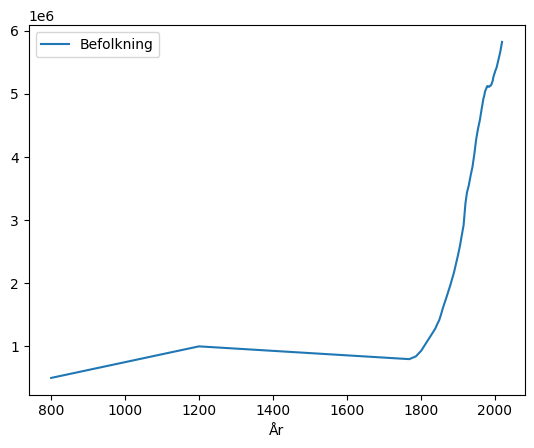

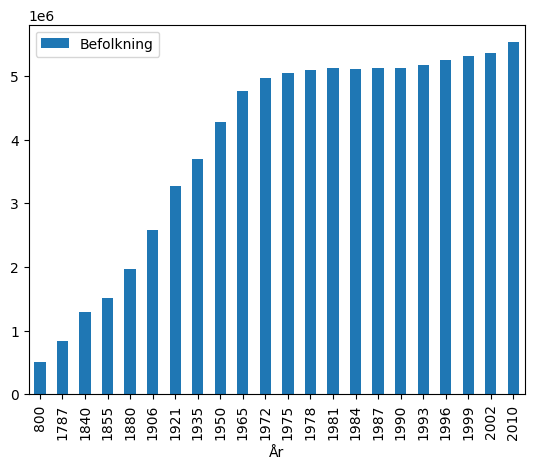

In [72]:
tables=pd.read_html("https://da.wikipedia.org/wiki/Danmarks_demografi#Befolkning")
tables[0]
dft = pd.DataFrame(tables[0]) 

# Combine the two bifurcated list 
dfa = pd.DataFrame()
dfb = pd.DataFrame()
dfa[["År","Befolkning"]] = dft[["År","Befolkning pr. 1. januar"]]
dfb[["År","Befolkning"]] = dft[["År.1","Befolkning pr. 1. januar.1"]]
df = pd.concat([dfa, dfb])

# Reste the index, remove rows that holds no values, reset index
df.reset_index(drop=True, inplace=True)
df.drop(index=[34,35], inplace=True)
df.reset_index(drop=True, inplace=True)

# Remvoe the [n] from the first two values 
df["Befolkning"].astype(str)
#df["Befolkning"][0] = df["Befolkning"][0][:-3]
df.loc[0, "Befolkning"] = df["Befolkning"][0][:-3]
df.loc[1, "Befolkning"] = df["Befolkning"][1][:-3]
#f["År"].astype(int)

# Fix the type and removing (.) inside the numbers
def to_int(df, col, reg):
    li = list(df[col])
    li = [ int(float( re.sub(reg,r"",str(st)) ) ) for st in li ]
    df[col]=li

to_int(df, "År", r"\.0" )
to_int(df, "Befolkning", r"[\.]")
df
df.plot( kind="line", y="Befolkning", x="År")
df[::3].plot( kind="bar", y="Befolkning", x="År")



---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


In [294]:
# Answer 
import pandas as pd 

# a)
tables = pd.read_html("https://sv.wikipedia.org/wiki/Norges_demografi#Befolkningsstatistik_sedan_1900")
tables[2]
dfa = pd.DataFrame()
def get_columns(df:"DataFrame"):
    li = list()
    for col, val in df.items():
        li.append(col)
    return li
column_old_names = get_columns(tables[2])
#print(column_old_names)
# Copy over the printout from column_old_names and modify it in place
column_new_names = ['År', 'Befolkning(p/k)', 'Födda', 'Döda', 'Naturlig förändring', 'Födelsetal(p/k)', 'Dödstal(p/k)', 'Naturlig förändring(p/k)', 'Total fertilitet']

# Takes a list of new column names and the old columns to those names 
def set_columns(df_old,column_new_names):
    counter = 0
    df_new = pd.DataFrame()
    for col, val in df_old.items():
        df_new[column_new_names[counter]] = val
        counter+=1 
    return df_new
dfa = set_columns(tables[2],column_new_names)

def to_int(df:"DataFrame", col:list, reg:str):
    for col_name in col:
        li = list(df[col_name])
        li = [ int(float( re.sub(reg,r"",str(st)) ) ) for st in li ]
        df[col_name]=li
to_int(dfa, ['Befolkning(p/k)', 'Födda', 'Döda', 'Naturlig förändring',], r"[\s]")

# Convert a list of columns to flot, takes a regex to get rid of unwated
# characters and uses pre(precision) to modify the number if you want 
# it smaller
def to_float(df:"DataFrame", col:list, reg:str, pre:int=0):
    for col_name in col:
        li = list(df[col_name])
        li = [ float( re.sub(reg,r"",str(st)))/(10**pre)  for st in li ]
        df[col_name]=li
to_float(dfa, ['Födelsetal(p/k)', 'Dödstal(p/k)', 'Naturlig förändring(p/k)',], r"[\s]", 1)


#b) 
dfa["Total fertilitet"]

def plot_missing_values( df:"DataFrame" )->None:
    # Print if True 
    print( df.isnull().values.any() ) 
    # Print column and number 
    print( df.isnull().sum()[ df.isnull().sum() > 0 ] )
    # Plots graph
    #df.isnull().sum()[ df.isnull().sum() > 0 ].plot( kind="bar", )
    #plt.show()
def get_missing_index( col:"Series" ) -> list:
    #index = dict()
    #df.index()
    #df.isnull().sum()[ df.isnull().sum() > 0 ]
    #return 
    print(  ) 
#pmv(df)
#h(df)
plot_missing_values(dfa)
type(dfa["Total fertilitet"])
idx = dfa[dfa.isnull().any(axis=1)].index
dfa["Total fertilitet"][idx]
for e in dfa.loc[idx]["År"].items():
   # print(e)
   pass

tables = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Norway#Fertility")
dfb = set_columns( tables[-16][["Unnamed: 0", "Total fertility rates[fn 1][6][9]"]], ["År","Total fertilitet"])
dfb
dfa
for idx, row in dfa.iterrows():
    if pd.isna( row["Total fertilitet"] ):
        #pass
        #print(f" {dfa.loc[idx]["Total fertilitet"]} : {dfb.loc[idx]["Total fertilitet"]}" )
        #dfa.loc[idx]["Total fertilitet"].apply( lambda x: dfb.loc[idx]["Total fertilitet"]) #= dfb.loc[idx]["Total fertilitet"]
        #dfa[idx]["Total fertilitet"] = 500
        dfa.at[idx, "Total fertilitet"] = dfb.loc[idx]["Total fertilitet"]

#dfa.describe()
#dfa.at[0, "Total fertilitet"] = 125
#dfa.loc[0]["Total fertilitet"]
dfa["Total fertilitet"].isna().sum()

True
Total fertilitet    28
dtype: int64


0

In [394]:
df = pd.DataFrame({"Red":["1 0,0453","2 0,","3 0,34670"],"Blue":["1 0,0453","2 0,","3 0,34670"]})
#df["Red"] = df["Red"].apply(lambda x: x*10 )
df.iloc[:,0]
df["Red"]=df["Red"].apply(lambda x: float(re.sub(r"\s|,\d*", "", str(x))) )
df["Blue"]=df["Blue"].apply(lambda x: float(re.sub(r"\s|,\d*", "", str(x))) )
df.iloc[:,0] + df.iloc[:,1]

0    20.0
1    40.0
2    60.0
dtype: float64

---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>

In [405]:
# Answer
import pandas as pd
import re

tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi#Befolkningsstatistik_sedan_1900")
tables[6]




# columns is a dict 
# key : is an intiger that corespond with the columns position in the data. 
# 0 : The new column name (first column is 0, index column is not included)
# 1 : The data type you wan't to convert the column to
# 2 : The regex string you want to use to format the value
# 3 : The devider so you can move the the decimal marker higher 
def data_preprocessing(data:"Dataframe",columns:dict):
    df = pd.DataFrame()

    switch = {
        "int": lambda val: int(float( re.sub(column[2],r"",str(val)))/(10**column[3])),
        "float": lambda val: float( re.sub(column[2],r"",str(val)))/(10**column[3]),
    }

    for idx, column in columns.items():
        df[column[0]] = data.iloc[:,[idx]].apply(lambda content: [ switch[column[1]](val) for val in content  ] )
    return df

# 1: Space or , followed by 0 or more didgits
c = {
    0:("År","int",r"",0), 
    1:("Folkmängd","int",r"\s|,\d*",0), 
    8:("Fertilitet","float",r"\.\d*",2) 
    }

df_sweden = data_preprocessing(tables[6], c)
df_sweden

tables = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Norway#Fertility")
tables[30]

c ={
    0:("År","int",r"",0), 
    1:("Folkmängd","int",r",|\s\[\d*\]",0), 
    9:("Fertilitet","float",r"",0)     
    }
df_norway = data_preprocessing(tables[30], c)
df_norway
def print_missing_values(df):   
    #print( df.isnull().values.any() ) 
    print( df.isnull().sum()[ df.isnull().sum() > 0 ] )

df_norway.drop(index=[121,122,123,124], inplace=True)
df_sweden.drop(index=[121,122], inplace=True)
#df_sweden.drop(index=[124], inplace=True)
print_missing_values(df_norway)
print_missing_values(df_sweden)
df_sweden
def combine_dataframes(dfa,dfb,operations):
    df=pd.DataFrame()
    switch = {
        "owerwrite": lambda : dfb.iloc[:,idx],
        "add": lambda : dfa.iloc[:,idx] + dfb.iloc[:,idx],
        "mean":lambda : (dfa.iloc[:,idx] + dfb.iloc[:,idx])/2,
    }
    for idx, op in operations.items(): 
        name = dfa.iloc[:,idx].name
        df[name] = switch[op]()
        
    return df
o = {
    0:"owerwrite",
    1:"add",
    2:"mean"
}
df_sweden_norway = combine_dataframes(df_sweden,df_norway,o)
df_sweden_norway


Series([], dtype: int64)
Series([], dtype: int64)


,År,Folkmängd,Fertilitet
0,1900,7348000,4.210
1,1901,7411000,4.205
2,1902,7463000,4.105
3,1903,7498000,3.990
4,1904,7539000,3.950
...,...,...,...
116,2016,15136085,1.780
117,2017,15315697,1.705
118,2018,15471213,1.655
119,2019,15606887,1.615


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---